In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are availablea in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df=pd.read_csv("/Users/harish/Desktop/archive/aug_train.csv")

# **Data Pre-processing**

In [55]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [57]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [58]:
column_object = []
column_non_object = []
for i in df.columns:
  if df[i].dtypes == 'object':
    column_object.append(i)
  else:
    column_non_object.append(i)

In [7]:
column_object

[]

In [8]:
column_non_object

[]

In [59]:
d = pd.DataFrame()
name = [] ; unique = [] ; num_uni = []; nan=[]
for column in df.columns:
  name.append(column)
  unique.append(df[column].unique())
  num_uni.append(df[column].unique().size)
  nan.append(df[column].isnull().sum())
d['name'] = name
d['unique'] = unique
d['num_uni'] = num_uni
d['nan'] = nan
d

,name,unique,num_uni,nan
0,enrollee_id,"[8949, 29725, 11561, 33241, 666, 21651, 28806,...",19158,0
1,city,"[city_103, city_40, city_21, city_115, city_16...",123,0
2,city_development_index,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767...",93,0
3,gender,"[Male, nan, Female, Other]",4,4508
4,relevent_experience,"[Has relevent experience, No relevent experience]",2,0
5,enrolled_university,"[no_enrollment, Full time course, nan, Part ti...",4,386
6,education_level,"[Graduate, Masters, High School, nan, Phd, Pri...",6,460
7,major_discipline,"[STEM, Business Degree, nan, Arts, Humanities,...",7,2813
8,experience,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...",23,65
9,company_size,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999...",9,5938


In [60]:
nan_col = []
for col in df.columns:
  if df[col].isnull().sum() != 0:
    nan_col.append(col)
nan_col

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[nan_col] = imputer.fit_transform(df[nan_col])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [63]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [64]:
df.loc[df['experience'] == '>20', 'experience'] = '21'
df.loc[df['experience'] == '<1', 'experience'] = '0'
df['experience'] = df['experience'].astype(int)
df['experience'].unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20])

In [65]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [66]:
df.loc[df['last_new_job'] == '>4', 'last_new_job'] = '5'
df.loc[(df['last_new_job'] == 'never') & (df['experience'] <3), 'last_new_job'] = '5'
df.loc[df['last_new_job'] == 'never', 'last_new_job'] = '1'
df['last_new_job'] = df['last_new_job'].astype(int)

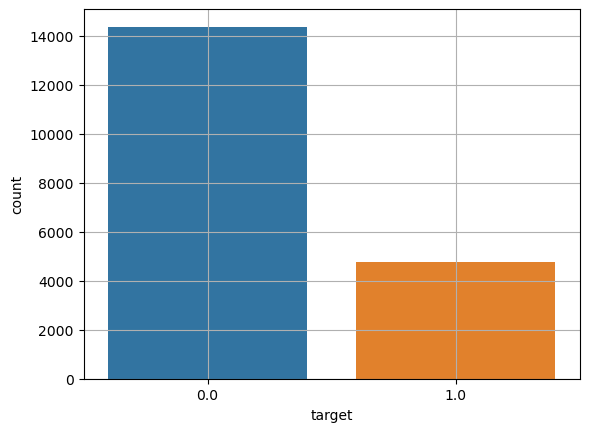

In [67]:
sns.countplot(data = df, x = 'target')
plt.grid(True)
plt.show()

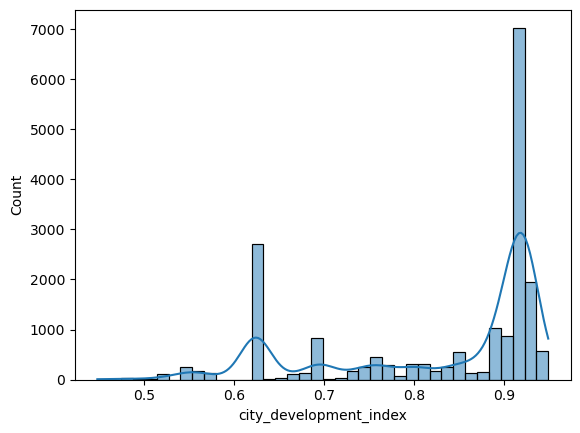

In [68]:
sns.histplot(data = df, x = 'city_development_index', kde = True)
plt.show()

In [69]:
df.describe()

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,10.137123,2.254150,65.366896,0.249348
std,9616.292592,0.123362,6.795143,1.617031,60.058462,0.432647
min,1.000000,0.448000,0.000000,1.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,1.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,1.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,4.000000,88.000000,0.000000
max,33380.000000,0.949000,21.000000,5.000000,336.000000,1.000000


In [70]:
df['city_divide'] = 'low'
df.loc[df['city_development_index'] > 0.7, 'city_divide'] = 'medium'
df.loc[df['city_development_index'] > 0.9, 'city_divide'] = 'high'

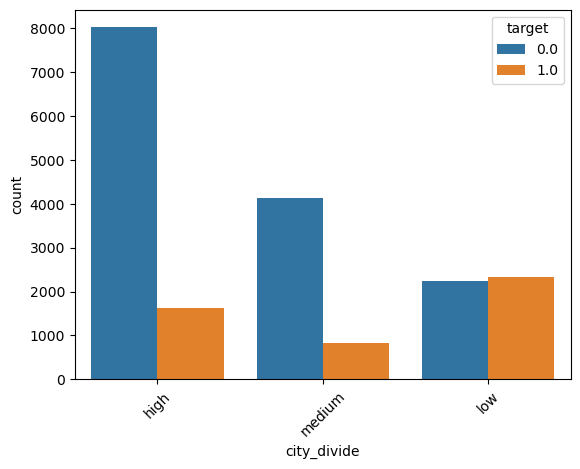

In [71]:
sns.countplot(data = df, x = 'city_divide', hue= 'target')
plt.xticks(rotation = 45)
plt.show()

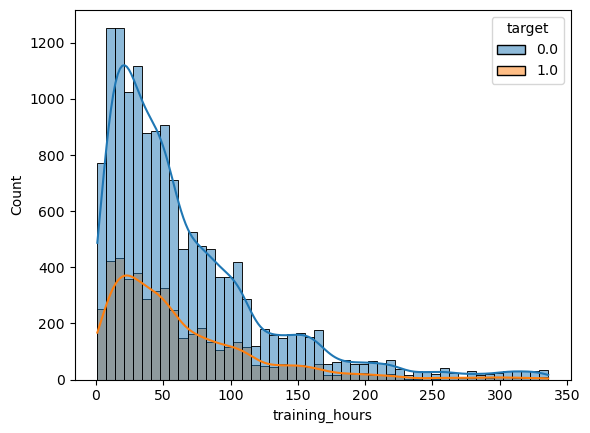

In [72]:
sns.histplot(data = df, x = 'training_hours', hue = 'target', bins = 50, kde = True)
plt.show()

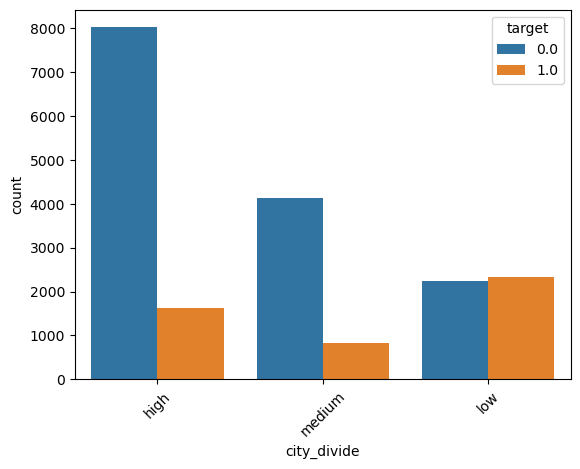

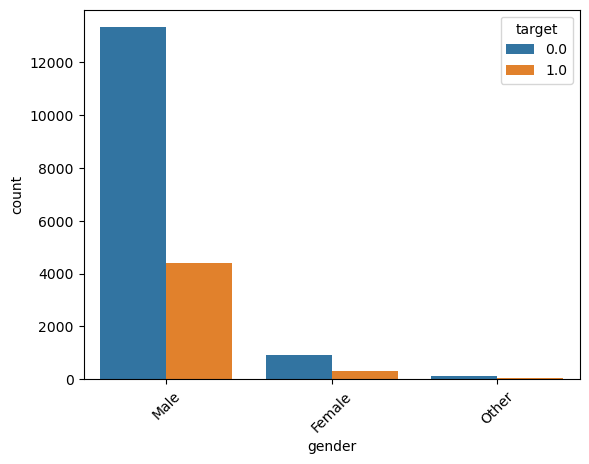

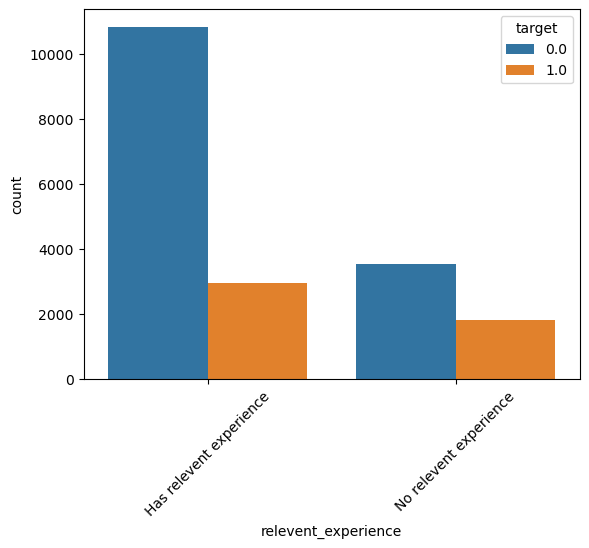

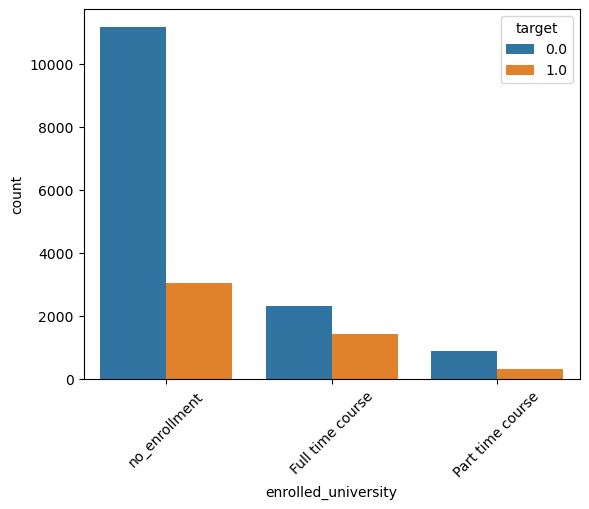

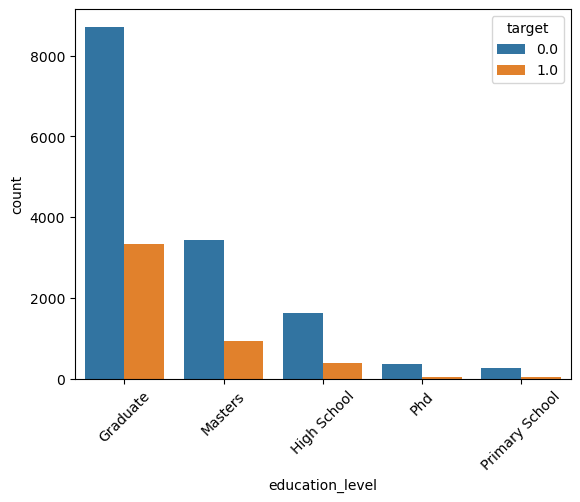

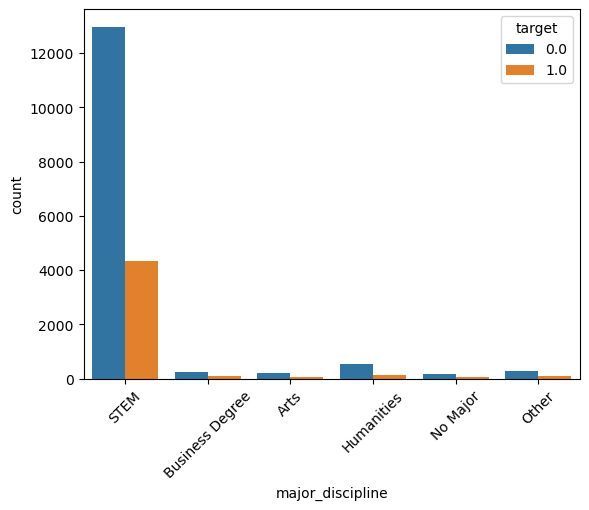

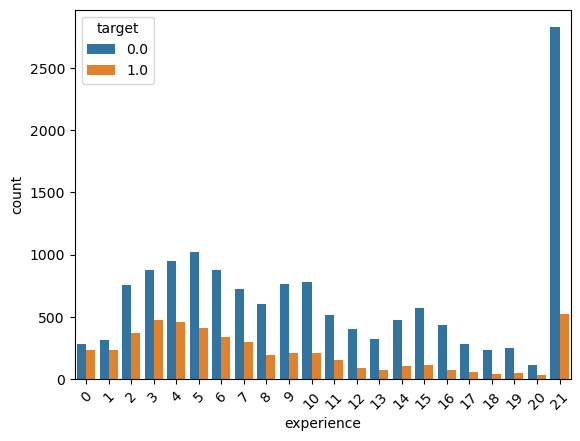

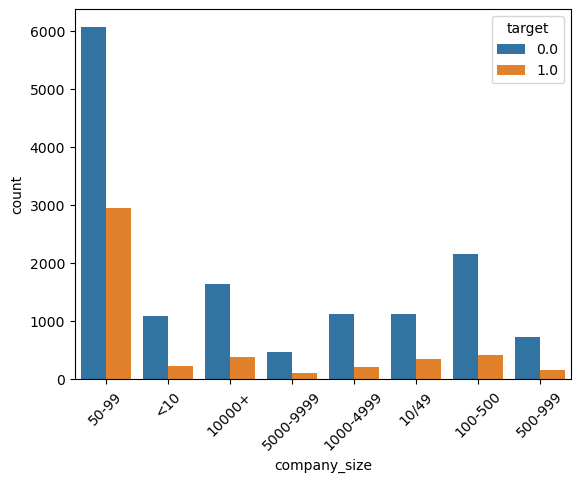

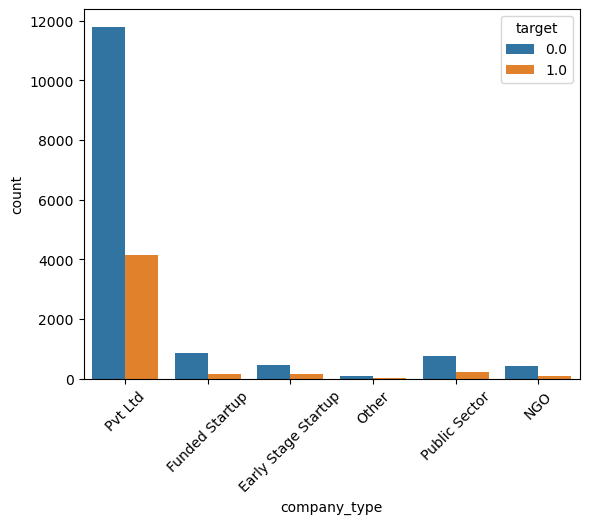

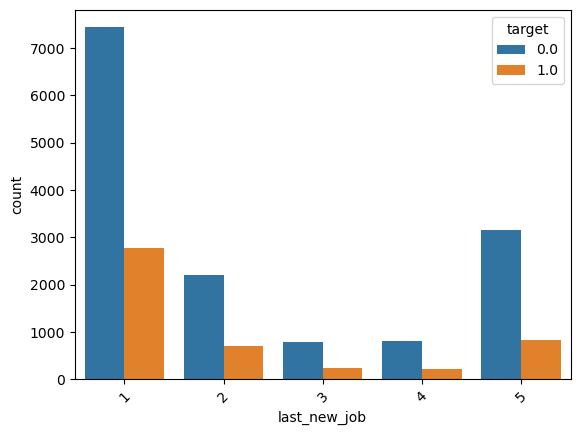

In [73]:
column = ['city_divide','gender','relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

for col in column:
  sns.countplot(data = df, x = col, hue= 'target')
  plt.xticks(rotation = 45)
  plt.show()

In [74]:
def percent (df,column):
  raw = df.groupby(column)['target'].value_counts().unstack()
  raw1 = raw.div(raw.sum(axis =1),axis = 0)*100
  raw1.plot(kind = 'bar', stacked = True)
  plt.xticks(rotation = 45)
  plt.show()

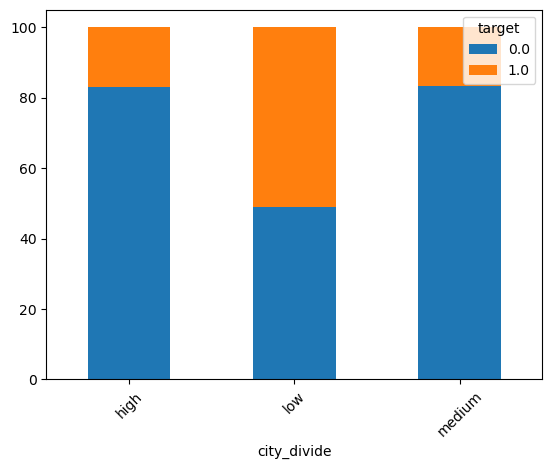

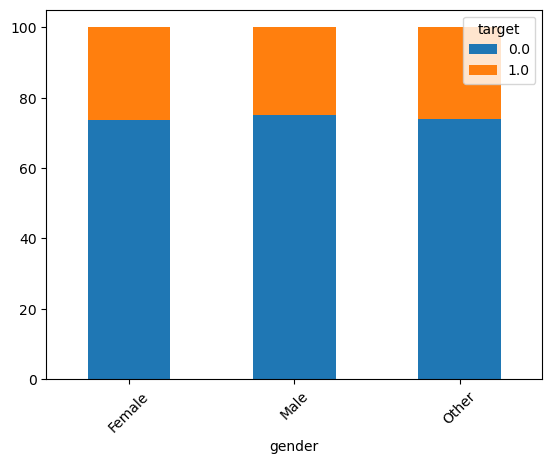

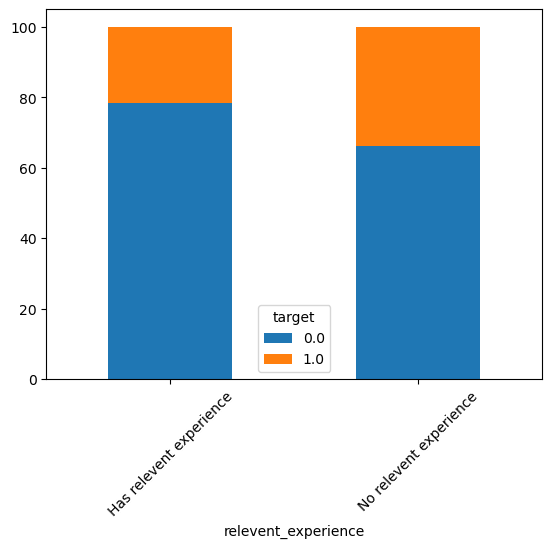

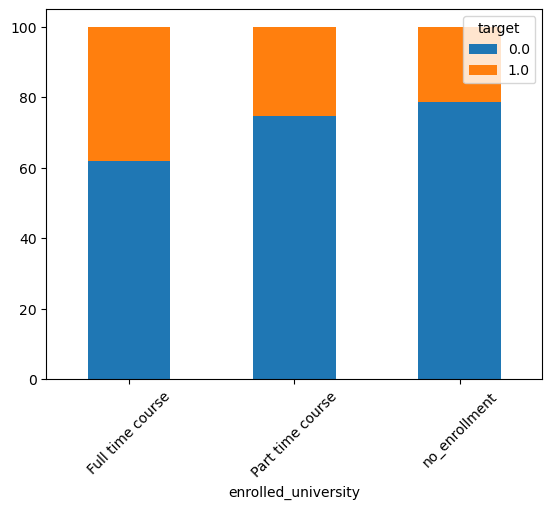

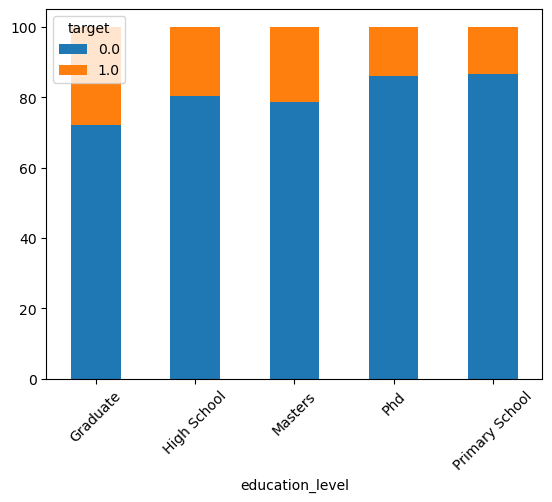

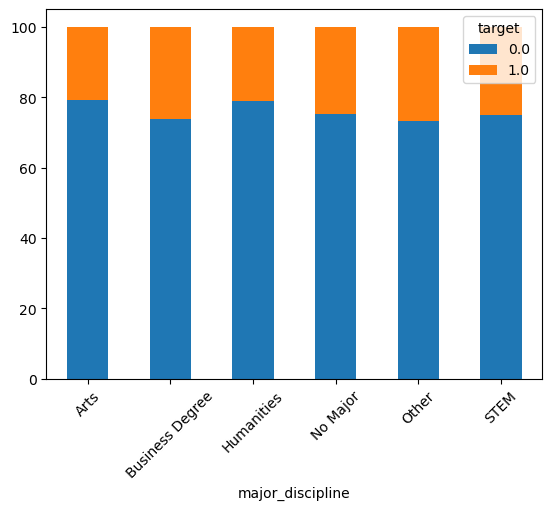

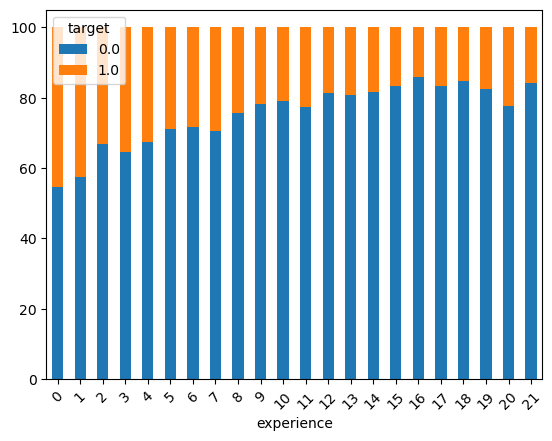

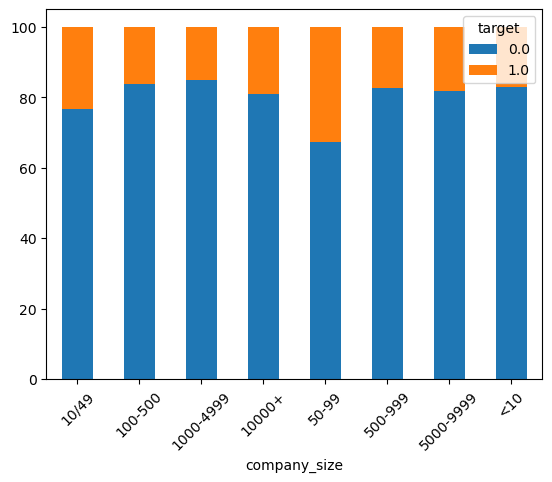

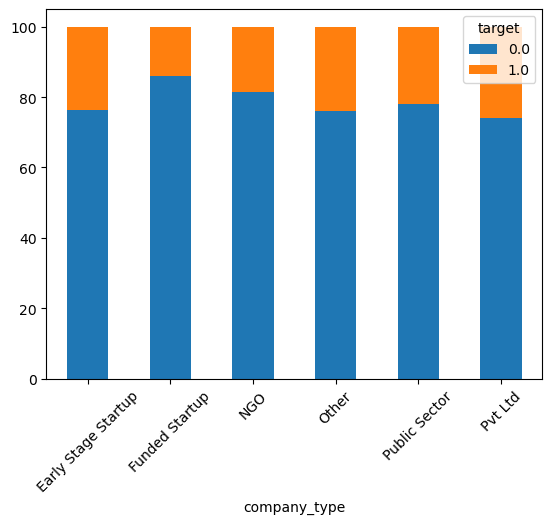

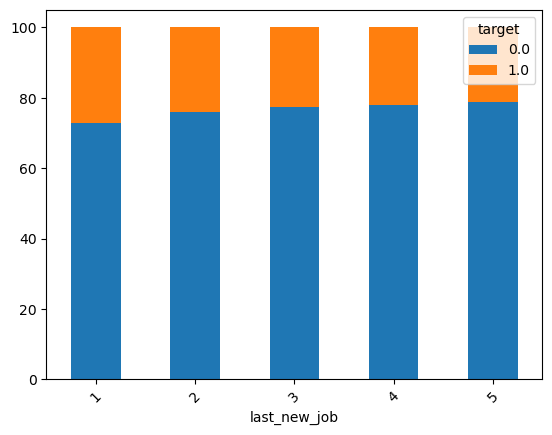

In [75]:
column = ['city_divide','gender','relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']
for col in column:
  percent(df,col)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  city_divide             19158 non-null

In [77]:
df.drop(columns = ['enrollee_id','city','gender','major_discipline','company_type'],inplace = True)

In [78]:
nominals = ['relevent_experience','enrolled_university']
ordinals = ['education_level','company_size','city_divide','company_divide']


In [79]:
df = pd.get_dummies(df,columns= nominals)

In [80]:
education_level_map = {'Primary School': 1,
                        'High School': 2,
                        'Graduate': 3,
                        'Masters': 4,
                        'Phd' : 5}
company_size_map = {
    '<10'       : 0,
    '10/49'     : 1,
    '50-99'     : 2,
    '100-500'   : 3,
    '500-999'   : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+'    : 7
}
city_divide_map = {'high':3, 'medium':2, 'low':1}
df['education_level'] = df['education_level'].map(education_level_map)
df['company_size'] = df['company_size'].map(company_size_map)
df['city_divide'] = df['city_divide'].map(city_divide_map)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       19158 non-null  float64
 1   education_level                              19158 non-null  int64  
 2   experience                                   19158 non-null  int64  
 3   company_size                                 19158 non-null  int64  
 4   last_new_job                                 19158 non-null  int64  
 5   training_hours                               19158 non-null  int64  
 6   target                                       19158 non-null  float64
 7   city_divide                                  19158 non-null  int64  
 8   relevent_experience_Has relevent experience  19158 non-null  uint8  
 9   relevent_experience_No relevent experience   19158 non-null  uint8  
 10

In [82]:
df1 = df

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df), columns=df1.columns)

In [84]:
X = df1.drop('target', axis=1)
y = df1['target']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Model

In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
import numpy as np

# Define the model
svc_model = SVC(gamma='auto')

# Define scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro']  # Changed from set to list

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform the cross-validation and capture the scores
scores = cross_validate(svc_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Print the mean scores
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Precision: 0.6873
Mean Recall: 0.6009


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
import numpy as np

# Define the logistic regression model
lr_model = LogisticRegression()

# Define the scoring metrics in a list format instead of a set
scoring = ['accuracy', 'precision_macro', 'recall_macro']

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Execute cross-validation
scores = cross_validate(lr_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Output the mean of the precision and recall
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Precision: 0.6867
Mean Recall: 0.5933


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
import numpy as np

# Define the random forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the scoring metrics in a list or dictionary format
scoring = ['accuracy', 'precision_macro', 'recall_macro']  # Use list to maintain order

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Execute cross-validation
scores = cross_validate(rf_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Output the mean of the precision and recall
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Precision: 0.6699
Mean Recall: 0.6371


In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
from sklearn.linear_model import LogisticRegression


param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg_model = LogisticRegression()

grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid_logreg, cv=3, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print("Logistic Regression Best Parameters:", grid_search_logreg.best_params_)
print("Logistic Regression Best Score:", grid_search_logreg.best_score_)

/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/harish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Best Score: 0.7744966442953021


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

# Initialize the Logistic Regression model
lr_model = LogisticRegression(C=1, penalty='l2', solver='saga')

# Define scoring metrics in a list format to maintain order
scoring = ['accuracy', 'precision_macro', 'recall_macro']  # Use list to maintain order

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Execute cross-validation
scores = cross_validate(lr_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Output the mean of the precision and recall
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Accuracy: 0.7680
Mean Precision: 0.6866
Mean Recall: 0.5932


In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop =70, num= 10)],
    'max_depth': [2,4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 43}
Test Accuracy: 0.7701809324982603


In [104]:
rf_model = RandomForestClassifier(max_depth = 4,min_samples_leaf = 1, min_samples_split= 2, n_estimators= 63)
# Define the scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_macro': make_scorer(recall_score, average='macro')}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Perform cross-validation
scores = cross_validate(rf_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Print the mean precision and recall
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Precision: 0.7051
Mean Recall: 0.6540


In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [106]:
y_sm.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define scoring metrics as a list to maintain order
scoring = ['accuracy', 'precision_macro', 'recall_macro']

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Execute cross-validation
scores = cross_validate(rf_model, X_sm, y_sm, scoring=scoring, cv=cv, n_jobs=-1)

# Output the mean of the precision and recall
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Accuracy: 0.8354
Mean Precision: 0.8355
Mean Recall: 0.8354


In [109]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=21)

In [110]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

# Example: Generating synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Define the model and parameter grid
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=70, num=10)],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fitting GridSearchCV
grid_search.fit(X_sm, y_sm)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


In [111]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Example: Generating synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Define the model with specific hyperparameters
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=23)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Perform cross-validation
scores = cross_validate(rf_model, X_sm, y_sm, scoring=scoring, cv=cv, n_jobs=-1)

# Print the mean precision and recall
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))


Mean Precision: 0.9971
Mean Recall: 0.9971
